In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [9]:
crime=pd.read_csv("crime_data.csv")

In [10]:
crime.head(15)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


# Hierarchical Clustering

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [17]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [20]:
df_norm=norm_func(crime.iloc[:,1:])

In [22]:
df_norm.head(20)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


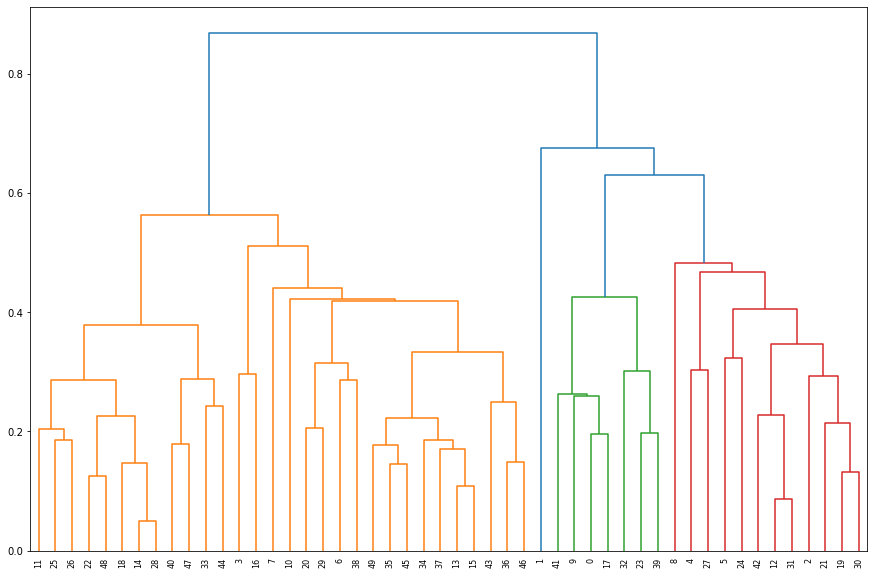

In [26]:
plt.figure(figsize=(15, 10))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [27]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [40]:
pred=hc.fit_predict(df_norm)

In [41]:
pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [42]:
crime['h_clusterid']=hc.labels_

In [88]:
crime.shape

(50, 6)

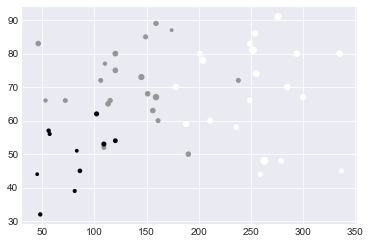

In [75]:
plt.scatter(crime.iloc[:,2],crime.iloc[:,3],crime.iloc[:,4],c=pred)

# K-means

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import matplotlib.pyplot as plt

plt.style.use("seaborn-darkgrid")


In [77]:
crimeK=pd.read_csv("crime_data.csv")

In [78]:
scaler = MinMaxScaler()
crime_scaled = scaler.fit_transform(crimeK.iloc[:,1:])

In [79]:
df_norm=norm_func(crimeK.iloc[:,1:])

In [80]:
df_norm.head(5)

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


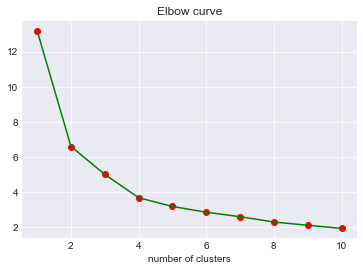

In [81]:
# Elbow curve
ec=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    ec.append(kmeans.inertia_)
plt.plot(range(1,11),ec,color="green")
plt.scatter(range(1,11),ec,color="red")
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.show()

In [82]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 3, 2, 3, 1, 0, 1,
       3, 2, 0, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 3, 0])

In [97]:
model = KMeans(n_clusters=3, max_iter=40, algorithm = 'auto',init="k-means++")
#model.fit(iris_scaled)

In [98]:
model.fit(crime_scaled)

KMeans(max_iter=40, n_clusters=3)

In [99]:
pred=model.predict(crime_scaled)

In [100]:
pred

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0,
       1, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2])

In [101]:
model.cluster_centers_

array([[0.69467343, 0.73395818, 0.61552186, 0.56629947],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.31425703, 0.33866058, 0.68361582, 0.31122595]])

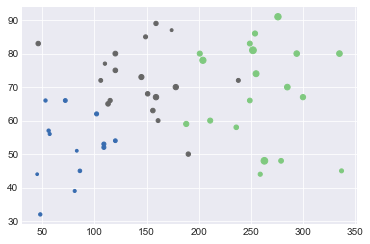

In [102]:
plt.scatter(crime.iloc[:,2],crime.iloc[:,3],crime.iloc[:,4],c=pred,cmap=plt.cm.Accent)

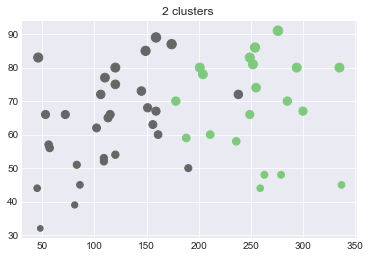

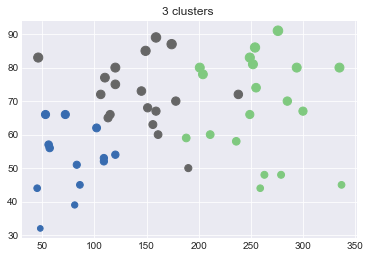

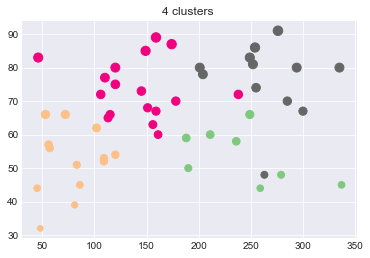

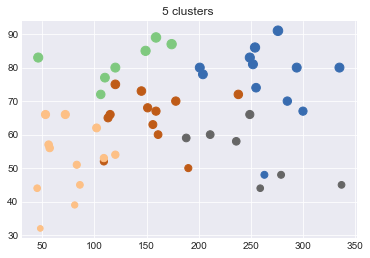

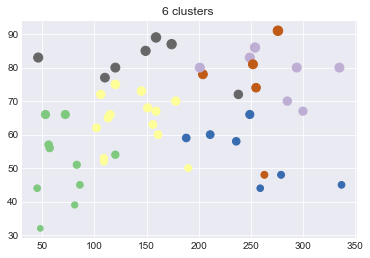

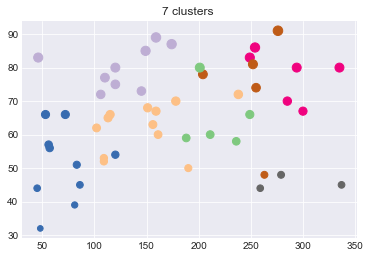

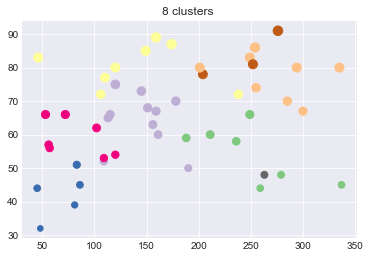

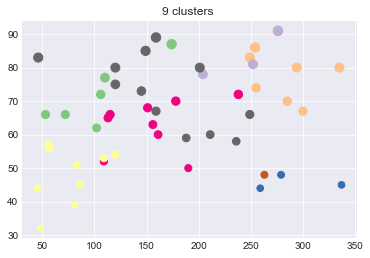

In [103]:
for i in range(2,10):
    model = KMeans(n_clusters=i, max_iter=40, algorithm = 'auto',init="k-means++",)
    model.fit(crime_scaled)    
    pred=model.predict(crime_scaled)    
    plt.scatter(crime.iloc[:,2],crime.iloc[:,3],crime.iloc[:,3],c=pred,cmap=plt.cm.Accent)
    plt.title(str(i)+ " clusters ")
    plt.show()


In [104]:
model.cluster_centers_

array([[0.17871486, 0.19805936, 0.67231638, 0.14082687],
       [0.53614458, 0.68150685, 0.8700565 , 0.89061154],
       [0.63855422, 0.81066536, 0.76513317, 0.57918051],
       [0.13587684, 0.1065449 , 0.2693032 , 0.09790411],
       [0.8253012 , 0.84474886, 0.23163842, 0.29112834],
       [0.4103079 , 0.38280061, 0.52354049, 0.31409704],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.26592083, 0.28522505, 0.79418886, 0.3839055 ],
       [0.81807229, 0.5890411 , 0.55254237, 0.43979328]])

# DBSCAN

In [123]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as sil

In [124]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50 non-null     object 
 1   Murder       50 non-null     float64
 2   Assault      50 non-null     int64  
 3   UrbanPop     50 non-null     int64  
 4   Rape         50 non-null     float64
 5   h_clusterid  50 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 2.5+ KB


In [125]:
df=crime.iloc[:,1:5]

In [126]:
df.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [127]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [128]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [129]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [130]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [131]:
cluster=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [132]:
cluster

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [133]:
pd.concat([crime,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid,cluster
0,Alabama,13.2,236,58,21.2,0,0
1,Alaska,10.0,263,48,44.5,0,-1
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,1,0
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,0
9,Georgia,17.4,211,60,25.8,0,0


# silhouette_score

In [134]:
nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(crime.iloc[:,1:])
    iner.append(sil(crime.iloc[:,1:],y))

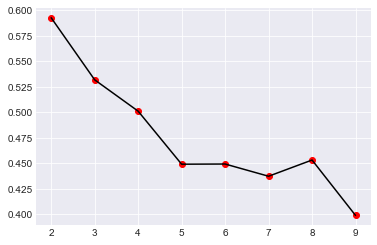

In [135]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()